In [1]:
"""
# openCV 이미지 다루기
# gramman 0.1 study documentation = https://bit.ly/3jKw6NR
"""
print(__doc__)


# openCV 이미지 다루기
# gramman 0.1 study documentation = https://bit.ly/3jKw6NR



In [2]:
import os
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from _path import DIR_SRC, get_cut_dir, stop_if_none


# functions : for a few initial path setting



In [4]:
valid_exts = 'jpg bmp png'.split()
imgs = [file for file in os.listdir(DIR_SRC)
           if len(file.split('.')) > 1 and file.split('.')[-1] in valid_exts]
imgs

['david.jpg',
 'coins.png',
 'namecard1.jpg',
 'namecard2.jpg',
 'cat.bmp',
 'lena.bmp',
 'namecard3.jpg',
 'Lenna.png',
 'float_face.png']

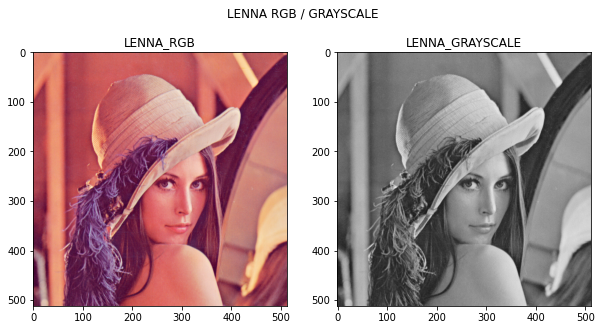

In [5]:
img1 = plt.imread(DIR_SRC + imgs[7])
img2 = plt.imread(DIR_SRC + imgs[5])

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(img1)
axes[0].set_title('LENNA_RGB')

axes[1].imshow(img2)
axes[1].set_title('LENNA_GRAYSCALE')

plt.suptitle('LENNA RGB / GRAYSCALE')
plt.show()

In [6]:
def calcGrayHist(img):
    channels = [0]
    histSize = [256]
    histRange = [0, 256]
    hist = cv2.calcHist([img], channels, None, histSize, histRange)
    return hist


def getGrayHistImage(hist):
    histMax = np.max(hist)
    imgHist = np.full((110, 256), 255, dtype=np.uint8)

    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
        cv2.line(imgHist, (x, 101), (x, 110), x)

    #cv2.rectangle(imgHist, (0, 100), (255, 111), 0)
    return imgHist

In [16]:
def getRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

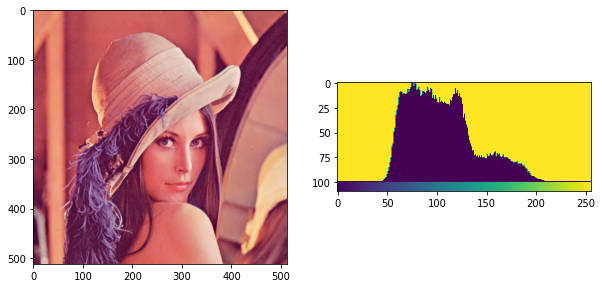

In [17]:
# src = cv2.imread(DIR_SRC + 'Lenna.png', cv2.IMREAD_GRAYSCALE)
"""
cv2.imshow('src', src)
cv2.imshow('histImg', getGrayHistImage(calcGrayHist(src)))

cv2.moveWindow('src', 100,100)
cv2.moveWindow('histImg', 0,0)

cv2.waitKey()
cv2.destroyAllWindows()
"""

src = cv2.imread(DIR_SRC + imgs[7])
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(getRGB(src))
axes[1].imshow(getGrayHistImage(calcGrayHist(src)))

In [25]:
def get_infographes(image):
    src = cv2.imread(image)
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(getRGB(src))

    # axes[1].imshow(getGrayHistImage(calcGrayHist(src)))
    axes[1].imshow(getGrayHistImage(calcGrayHist(src)))

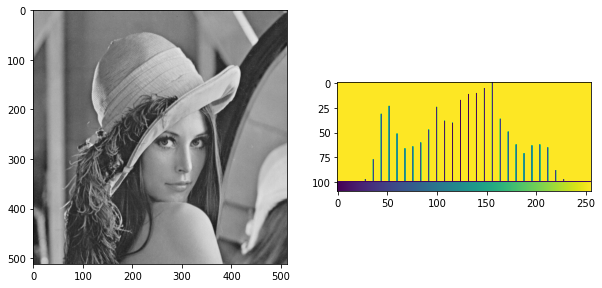

In [26]:
get_infographes(DIR_SRC + imgs[5])

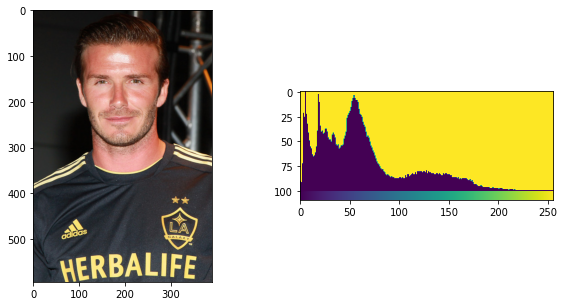

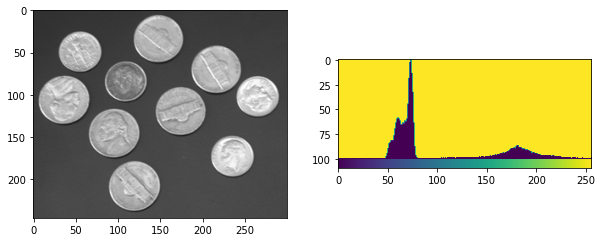

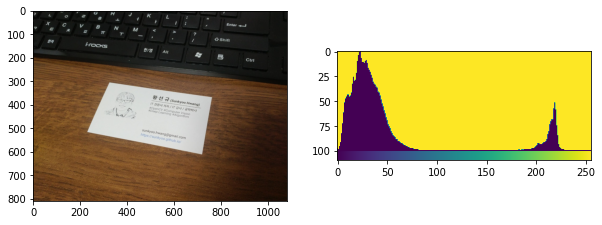

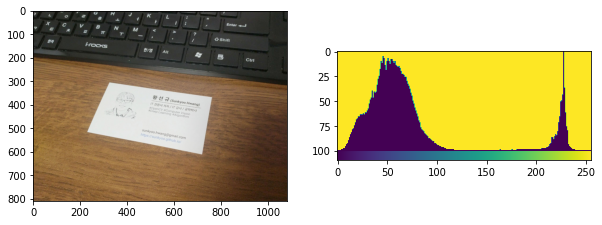

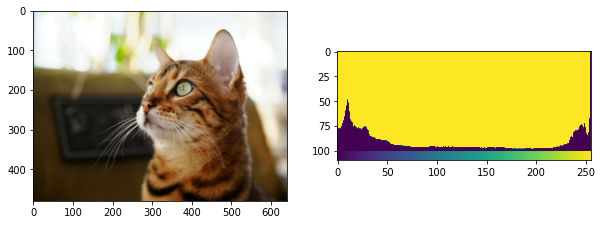

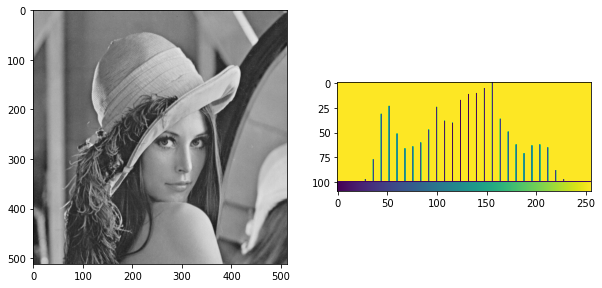

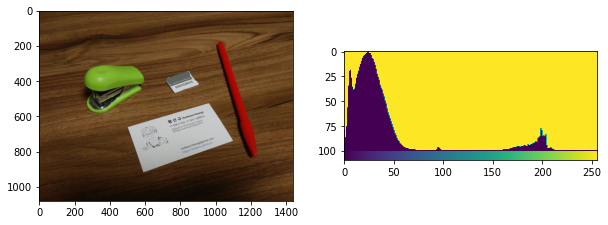

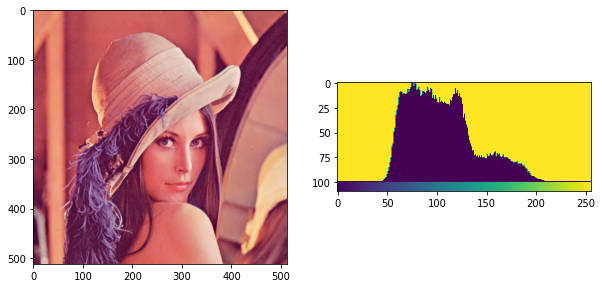

In [35]:
for img in imgs[:8]:
    get_infographes(DIR_SRC + img)